In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

The Little Spotted Kiwi (Apteryx owenii) is one of the 5 species of kiwi. We are lucky enough to have them living close to us, in Zealandia sanctuary up in Karori. They are lovely birds as you can see here: ![LSK](LSK1.jpg). 

One way to monitor the birds (since they are pretty cryptic, being active at night and hard to spot) is to listen to their calls. In Zealandia, Raewyn Empson has been getting volunteers to perform kiwi call counts every summer since the kiwi were translocated to the valley in 2001 and 2002. Knowing how many calls there are doesn't tell us so much about the number of birds unless we can assume that the number of calls increases linearly with the number of birds, which it probably doesn't. But it does reassure us that they are alive and doing OK.

The data from the Pylon listening post is in the file `ZealandiaKiwiCalls.xls`. It contains counts of the number of male and female birds heard on multiple dates, and can be loaded as follows (note that NaN means that nobody listened on that night, while 0 means that none were heard):

In [26]:
calls = pd.read_excel('../../res/data/ZealandiaKiwiCalls.xls',header=0)
calls["Date"]=pd.to_datetime(calls["Date"])
calls.head()

,Date,Year,Male,Female,Unknown,Total
0,2002-01-01,2002,1,0.0,NaN,1.0
1,2002-01-06,2002,8,3.0,NaN,11.0
2,2002-01-08,2002,8,6.0,NaN,14.0
3,2002-01-18,2002,11,8.0,NaN,19.0
4,2002-01-21,2002,9,6.0,NaN,15.0


Task 1: 
- Plot the average number of calls in each year for the males and females on one graph. (3 marks) 
- Comment on what you notice. (2 marks) 

The magic command that will do nearly all the work for you is a pivot table. Look up`pd.pivot_table` and look for the aggregate function (`aggfunc`). The syntax to use is `pd.pivot_table(dataframe, index, values, aggfunc)` where the dataframe is obvious, the index specifies the column(s) that you want to use to group by, values are the columns you want to output, and the aggfunc is how to combine the values.

After you have made the pivot table you will want to reset the index. This can be done for a dataframe called `pv_year_mean` using: 
`pv_year_mean = pv_year_mean.rename_axis(None, axis=1).reset_index()`

Comment: The average number of calls by male increases overtime while that of call by female fluctuates and can not reach over 2.5


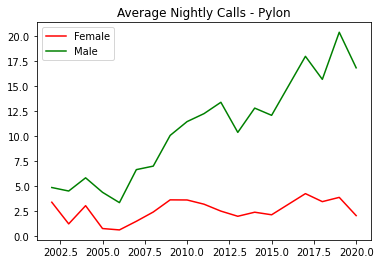

In [27]:
#pl.plot(calls['Total'])

pv_year_female = pd.pivot_table(calls,index='Year',aggfunc={'Female':np.mean})
pv_year_female = pv_year_female.rename_axis(None, axis=1).reset_index()
pl.plot(pv_year_female['Year'], pv_year_female['Female'], 'r', label='Female')

pv_year_male = pd.pivot_table(calls,index='Year',aggfunc={'Male':np.mean})
pv_year_male = pv_year_male.rename_axis(None, axis=1).reset_index()
pl.plot(pv_year_male['Year'], pv_year_male['Male'], 'g', label='Male')

pl.title('Average Nightly Calls - Pylon')
pl.legend()

print('Comment: {}'.format('The average number of calls by male increases overtime while that of call by female fluctuates and can not reach over 2.5'))

Task 2. 
- Plot the number of calls detected on each night against the year for the males and females on separate axes. (2 marks)
- Then use the `polyfit` command that we saw in the lectures to fit a straight line to the plots. There are three lines to using polyfit, the next cell should give you the idea. (3 marks) 
- Comment on whether the values of the fits verify you conclusions above. (1 mark)

You will need to use the `drop_na()` command.

In [28]:
#a = np.random.randn(20,2)
#pf = np.polyfit(a[:,0],a[:,1],1)
#f = np.poly1d(pf)
#pl.plot(a[:,0],a[:,1],'.')
#pl.plot(a[:,0],f(a[:,0]))
new_data = calls[['Year', 'Male', 'Female']].dropna(axis=0, how='any')

Male: 
0.8428 x - 1684
Female: 
0.07629 x - 150.8


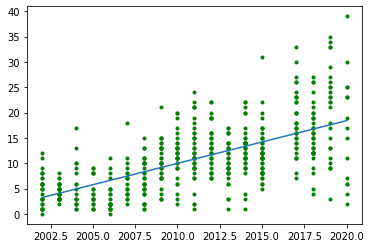

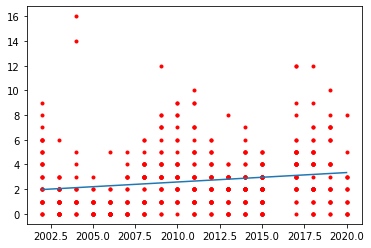

In [29]:
year = new_data['Year']
male = new_data['Male']
female = new_data['Female']

#slope_m, intercept_m = np.polyfit(year, male, deg=1)
#print('Males:\n{:.4f} x {}'.format(slope_m, round(intercept_m)))

#slope_f, intercept_f = np.polyfit(year, female, deg=1)
#print('Female:\n{:.4f} x {}'.format(slope_f, round(intercept_f)))

#pl.plot(year, male, '.g')
#pl.plot(year, slope_m*year + intercept_m)
#pl.show()

#pl.plot(year, female, '.r')
#pl.plot(year, slope_f*year + intercept_f)
#pl.show()

pf = np.polyfit(year, male, deg=1)
f = np.poly1d(pf)
print('Male:{}'.format(f))
pl.plot(year, male, '.g')
pl.plot(year, f(year))
pl.show()

pf = np.polyfit(year, female, deg=1)
f = np.poly1d(pf)
print('Female:{}'.format(f))
pl.plot(year, female, '.r')
pl.plot(year, f(year))
pl.show()

In [30]:
print('Comment: {}'.format('the values of the fits verify my conclusions as they show an increase number of calls detected on each night against the year for the males and females over time'))

Comment: the values of the fits verify my conclusions as they show an increase number of calls detected on each night against the year for the males and females over time


Some things that are thought to affect the rate of kiwi calling include the phase of the moon (since they can see better), and how wet the ground is (since there is more for them to eat). However, the evidence is a bit contradictory for it, so there may well be no correlation. You are going to test this for the Little Spotted Kiwi in Zealandia. The file `rain.csv` holds the amount of rain reported every day from 2004 onwards at the Kelburn weather station. It can be loaded as follows:

In [31]:
rain = pd.read_csv('../../res/data/rain.csv',header=2)
rain["Date"]=pd.to_datetime(rain["Date"],format="%Y%m%d")
rain.head()

,Station,Date,Time,Amount (mm),SofG,Deficit (mm),Runoff (mm),Period (Hrs),Freq
0,25354,2004-04-30,900,3.8,-,-,-,24,D
1,25354,2004-05-01,900,0.8,-,-,-,24,D
2,25354,2004-05-02,900,8.6,-,-,-,24,D
3,25354,2004-05-03,900,3.2,-,-,-,24,D
4,25354,2004-05-04,900,18.0,-,-,-,24,D


Task 3.
Merge the two datasets by adding this data to the calls dataframe for the nights when a kiwi call count was carried out (check out `pd.merge`). (2 marks)

In [32]:
new_dataframe = pd.merge(calls, rain, how='inner')
new_dataframe.head()

,Date,Year,Male,Female,Unknown,Total,Station,Time,Amount (mm),SofG,Deficit (mm),Runoff (mm),Period (Hrs),Freq
0,2005-01-14,2005,3,1.0,0.0,4.0,25354,800,0.0,-,41.5,0.0,24,D
1,2005-01-19,2005,1,0.0,0.0,1.0,25354,800,0.0,-,63.9,0.0,24,D
2,2005-01-22,2005,1,0.0,0.0,1.0,25354,800,0.0,-,77.3,0.0,24,D
3,2005-01-23,2005,1,0.0,0.0,1.0,25354,800,0.0,-,81.6,0.0,24,D
4,2005-01-25,2005,5,0.0,0.0,5.0,25354,800,0.0,-,85.8,0.0,24,D


The following code computes the phase of the moon. It returns the number of days since the new moon. Broadly, the full moon is at day 15, when it can be assumed to be light, while close to 0 and 30 there is very little moon. 

In [33]:
import datetime, math

def phase(date):
    n = np.floor(12.37 * (date.dt.year - 1900 + ((date.dt.month - 0.5)/12.0)))
    t = n / 1236.85
    az = 359.2242 + 29.105356 * n
    am = 306.0253 + 385.816918 * n + 0.010730 * t * t
    extra = 0.75933 + 1.53058868 * n + ((1.178e-4) - (1.55e-7) * t) * t + (0.1734 - 3.93e-4 * t) * np.sin(np.radians(az)) - 0.4068 * np.sin(np.radians(am))
    extra.where(extra<0,np.floor(extra),inplace=True)
    extra.where(extra>0,np.ceil(extra-1),inplace=True)
    julian = np.where((date.dt.year > 1801) & (date.dt.year < 2099),67 * date.dt.year - ((7 * (date.dt.year + ((date.dt.month + 9) / 12.0).astype(int))) / 4.0).astype(int) + ((275 * date.dt.month) / 9.0).astype(int) + date.dt.day + 1721013.5 + (date.dt.hour + date.dt.minute / 60.0 + date.dt.second / 3600) / 24.0 - 0.5 * np.copysign(1, 100 * date.dt.year + date.dt.month - 190002.5) + 0.5,0) 
    jd = (2415020 + 28 * n) + extra
    return (julian-jd + 30)%30


Task 4.
- Run this function for each date in the calls dataset and add a new column called "Moon" or similar. (2 marks)
- Add another column called light, which has 3 categories: 0 - dark, 1 - medium, 2 - bright according to the phase of the moon. (2 marks)

In [34]:
new_dataframe['Moon'] = phase(new_dataframe['Date'])

new_dataframe['Light']= new_dataframe['Moon'].apply(lambda x: 2.0 if (x>=10 and x<=20) else 1.0 if ((x>=5 and x<10) or (x>20 and x <=25)) else 0.0)

new_dataframe.head()

,Date,Year,Male,Female,Unknown,Total,Station,Time,Amount (mm),SofG,Deficit (mm),Runoff (mm),Period (Hrs),Freq,Moon,Light
0,2005-01-14,2005,3,1.0,0.0,4.0,25354,800,0.0,-,41.5,0.0,24,D,4.5,0.0
1,2005-01-19,2005,1,0.0,0.0,1.0,25354,800,0.0,-,63.9,0.0,24,D,9.5,1.0
2,2005-01-22,2005,1,0.0,0.0,1.0,25354,800,0.0,-,77.3,0.0,24,D,12.5,2.0
3,2005-01-23,2005,1,0.0,0.0,1.0,25354,800,0.0,-,81.6,0.0,24,D,13.5,2.0
4,2005-01-25,2005,5,0.0,0.0,5.0,25354,800,0.0,-,85.8,0.0,24,D,15.5,2.0


Task 5. Test the correlation of the amount of light and the number of calls and the amount of moisture and the number of calls. Comment on your findings. (3 marks)

In [35]:
corr_dataframe = new_dataframe[['Male', 'Female', 'Moon', 'Light', 'Amount (mm)']]
corr_matrix = corr_dataframe.corr()

corr_matrix

,Male,Female,Moon,Light,Amount (mm)
Male,1.000000,0.475546,0.043068,0.013398,0.055401
Female,0.475546,1.000000,0.095331,-0.011152,0.100969
Moon,0.043068,0.095331,1.000000,-0.031844,0.045545
Light,0.013398,-0.011152,-0.031844,1.000000,-0.017133
Amount (mm),0.055401,0.100969,0.045545,-0.017133,1.000000


In [36]:
print('Comment: ')
print('The amount of light has a negative relationship with the moon phase, the number of female calls, and the amount of moisture.')
print('The amount of light has a positive relationship with the number of male calls.')
print('A change of the amount of light has not been statistically significant affect to the other factors as an increase of one unit in light would not create not larger than 5% change on the number of calls, the amount of moisture, and the number of calls.')

Comment: 
The amount of light has a negative relationship with the moon phase, the number of female calls, and the amount of moisture.
The amount of light has a positive relationship with the number of male calls.
A change of the amount of light has not been statistically significant affect to the other factors as an increase of one unit in light would not create not larger than 5% change on the number of calls, the amount of moisture, and the number of calls.
